<a href="https://colab.research.google.com/github/zahriha/capstone_Xplisit/blob/main/ML/main22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [3]:
%cd gdrive/My\ Drive/
!ls

/content/gdrive/My Drive
'[2021] Bangk!t Academy Soft Skills Module 1 - Digital Branding and Interview Communication.pdf'
 archive.zip
 Classroom
'Colab Notebooks'
'Copy of Bangkit 2021 Capstone Project Plan Template (1).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template (2).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template (3).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template.gdoc'
 dataset
'[ILT-SS-02-D] Bangkit Career Development Class #2 - Digital Branding (2021-02-19 at 00:52 GMT-8)'
'Screenshot from 2021-02-14 22-33-29.png'
'Screenshot from 2021-02-15 01-08-10.png'
 Untitled0.ipynb
 Untitled1.ipynb


In [13]:
import os
import zipfile

aloperia_dir = os.path.join('train nail diseases/aloperia areata')
beau_dir = os.path.join('train nail diseases/beaus lines')
bluish_dir = os.path.join('train nail diseases/bluish nail')
clubbing_dir = os.path.join('train nail diseases/clubbing')
darier_dir = os.path.join('train nail diseases/Dariers disease')
eczema_dir = os.path.join('train nail diseases/eczema')
half_dir = os.path.join('train nail diseases/half and half nailes (Lindsays nails)')
koilonychia_dir = os.path.join('train nail diseases/koilonychia')
leukonychia_dir = os.path.join('train nail diseases/leukonychia')
muehrck_dir = os.path.join('train nail diseases/Muehrck-es lines')
onycholysis_dir = os.path.join('train nail diseases/onycholycis')
pale_dir = os.path.join('train nail diseases/pale nail')
red_dir = os.path.join('train nail diseases/red lunula')
splinter_dir = os.path.join('train nail diseases/splinter hemmorrage')
terry_dir = os.path.join('train nail diseases/terrys nail')
white_dir = os.path.join('train nail diseases/white nail')
yellow_dir = os.path.join('train nail diseases/yellow nails')

print('total training aloperia areata images:', len(os.listdir(aloperia_dir)))
print('total training beaus lines images:', len(os.listdir(beau_dir)))
print('total training bluish nail images:', len(os.listdir(bluish_dir)))
print('total training clubbing images:', len(os.listdir(clubbing_dir)))
print('total training Dariers disease images:', len(os.listdir(darier_dir)))
print('total training eczema images:', len(os.listdir(eczema_dir)))
print('total training half and half nailes (Lindsays nails) images:', len(os.listdir(half_dir)))
print('total training koilonychia images:', len(os.listdir(koilonychia_dir)))
print('total training leukonychia images:', len(os.listdir(leukonychia_dir)))
print('total training Muehrck-es lines images:', len(os.listdir(muehrck_dir)))
print('total training onycholycis images:', len(os.listdir(onycholysis_dir)))
print('total training pale nail images:', len(os.listdir(pale_dir)))
print('total training red lunula images:', len(os.listdir(red_dir)))
print('total training splinter hemmorrage images:', len(os.listdir(splinter_dir)))
print('total training terrys nail images:', len(os.listdir(terry_dir)))
print('total training white nail images:', len(os.listdir(white_dir)))
print('total training yellow nails images:', len(os.listdir(yellow_dir)))


aloperia_files = os.listdir(aloperia_dir)
print(aloperia_files[:10])
beau_files = os.listdir(beau_dir)
print(beau_files[:10])
bluish_files = os.listdir(bluish_dir)
print(bluish_files[:10])
clubbing_files = os.listdir(clubbing_dir)
print(clubbing_files[:10])
darier_files = os.listdir(darier_dir)
print(darier_files[:10])

eczema_files = os.listdir(eczema_dir)
print(eczema_files[:10])
half_files = os.listdir(half_dir)
print(half_files[:10])
koilonychia_files = os.listdir(koilonychia_dir)
print(koilonychia_files[:10])
leukonychia_files = os.listdir(leukonychia_dir)
print(leukonychia_files[:10])
muehrck_files = os.listdir(muehrck_dir)
print(muehrck_files[:10])

onycholysis_files = os.listdir(onycholysis_dir)
print(onycholysis_files[:10])
pale_files = os.listdir(pale_dir)
print(pale_files[:10])
red_files = os.listdir(red_dir)
print(red_files[:10])
splinter_files = os.listdir(splinter_dir)
print(splinter_files[:10])
terry_files = os.listdir(terry_dir)
print(terry_files[:10])
terry_files = os.listdir(terry_dir)
print(terry_files[:10])

white_files = os.listdir(white_dir)
print(white_files[:10])
yellow_files = os.listdir(yellow_dir)
print(yellow_files[:10])



total training aloperia areata images: 47
total training beaus lines images: 42
total training bluish nail images: 50
total training clubbing images: 40
total training Dariers disease images: 47
total training eczema images: 45
total training half and half nailes (Lindsays nails) images: 38
total training koilonychia images: 38
total training leukonychia images: 31
total training Muehrck-es lines images: 33
total training onycholycis images: 50
total training pale nail images: 35
total training red lunula images: 15
total training splinter hemmorrage images: 62
total training terrys nail images: 36
total training white nail images: 19
total training yellow nails images: 27
['2.PNG', '19.PNG', '15.PNG', '17.PNG', '16.PNG', '14.PNG', '13.PNG', '12.PNG', '18.PNG', '11.PNG']
['23.PNG', '20.PNG', '16.PNG', '10.PNG', '2.PNG', '17.PNG', '19.PNG', 'y.PNG', 'q.PNG', 'r.PNG']
['10.PNG', '14.PNG', '1.PNG', '13.PNG', '11.PNG', '12.PNG', '17.PNG', '16.PNG', '15.PNG', '6.PNG']
['9.PNG', '7.PNG', '6.

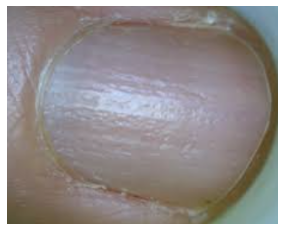

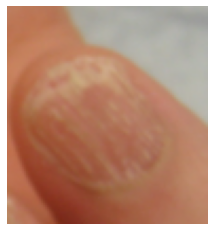

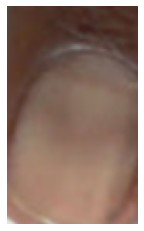

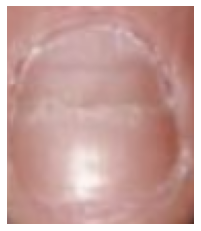

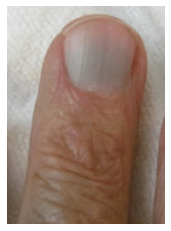

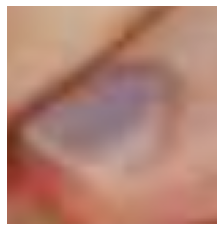

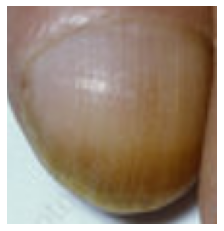

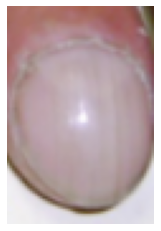

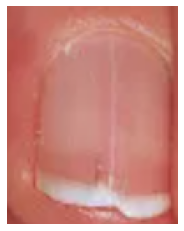

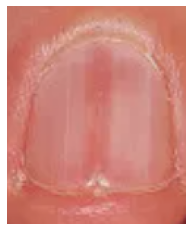

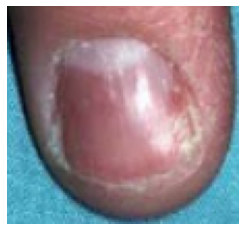

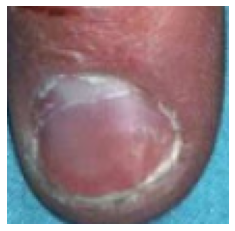

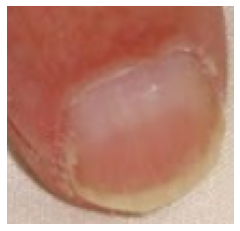

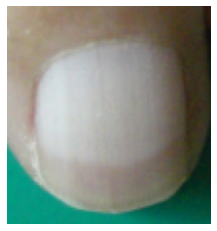

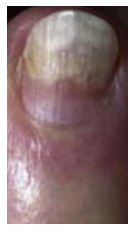

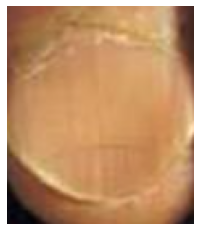

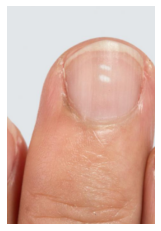

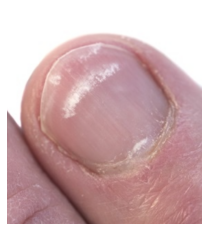

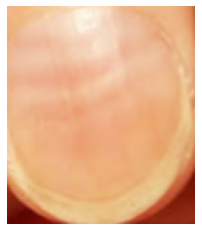

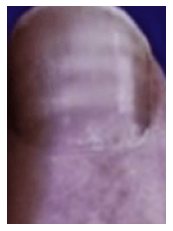

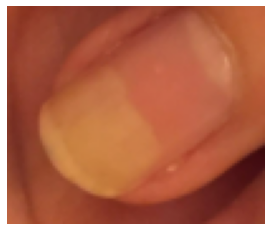

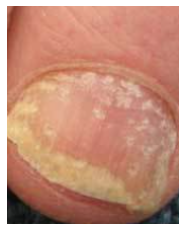

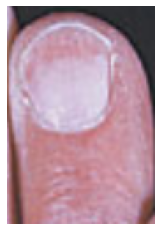

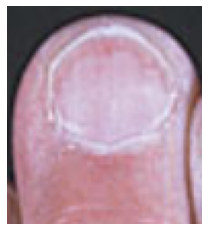

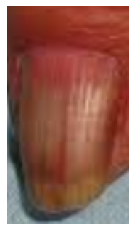

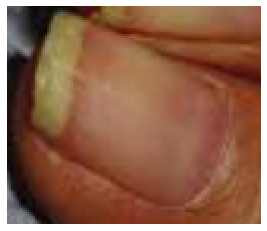

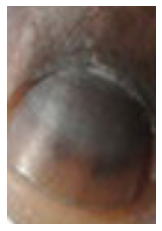

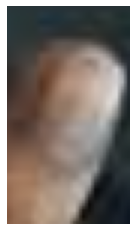

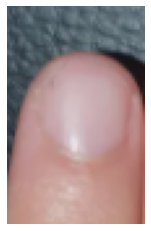

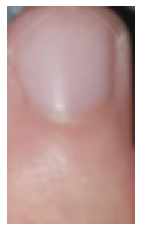

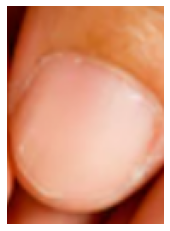

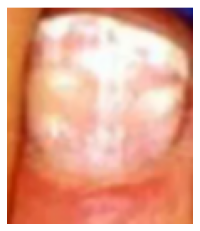

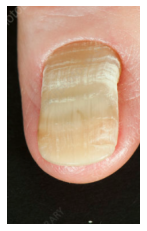

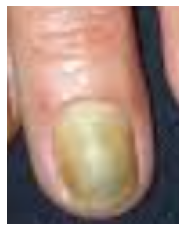

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_aloperia = [os.path.join(aloperia_dir, fname) 
                for fname in aloperia_files[pic_index-2:pic_index]]
next_beau = [os.path.join(beau_dir, fname) 
                for fname in beau_files[pic_index-2:pic_index]]
next_bluish = [os.path.join(bluish_dir, fname) 
                for fname in bluish_files[pic_index-2:pic_index]]
next_clubbing = [os.path.join(clubbing_dir, fname) 
                for fname in clubbing_files[pic_index-2:pic_index]]
next_darier = [os.path.join(darier_dir, fname) 
                for fname in darier_files[pic_index-2:pic_index]]

next_eczema = [os.path.join(eczema_dir, fname) 
                for fname in eczema_files[pic_index-2:pic_index]]
next_half = [os.path.join(half_dir, fname) 
                for fname in half_files[pic_index-2:pic_index]]
next_koilonychia = [os.path.join(koilonychia_dir, fname) 
                for fname in koilonychia_files[pic_index-2:pic_index]]
next_leukonychia = [os.path.join(leukonychia_dir, fname) 
                for fname in leukonychia_files[pic_index-2:pic_index]]
next_muehrck = [os.path.join(muehrck_dir, fname) 
                for fname in muehrck_files[pic_index-2:pic_index]]

next_onycholysis = [os.path.join(onycholysis_dir, fname) 
                for fname in onycholysis_files[pic_index-2:pic_index]]
next_pale = [os.path.join(pale_dir, fname) 
                for fname in pale_files[pic_index-2:pic_index]]
next_red = [os.path.join(red_dir, fname) 
                for fname in red_files[pic_index-2:pic_index]]
next_splinter = [os.path.join(splinter_dir, fname) 
                for fname in splinter_files[pic_index-2:pic_index]]
next_terry = [os.path.join(terry_dir, fname) 
                for fname in terry_files[pic_index-2:pic_index]]

next_white = [os.path.join(white_dir, fname) 
                for fname in white_files[pic_index-2:pic_index]]
next_yellow = [os.path.join(yellow_dir, fname) 
                for fname in yellow_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_aloperia+next_beau+next_bluish+next_clubbing+next_darier+next_eczema+next_half+next_koilonychia+next_leukonychia
                             +next_muehrck+next_onycholysis+next_pale+next_red+next_splinter+next_terry+next_white+next_yellow):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [15]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "train nail diseases/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "validation nail diseases/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("nail.h5")


Found 655 images belonging to 17 classes.
Found 0 images belonging to 0 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

KeyError: ignored